In [ ]:
from __future__ import absolute_import,division,print_function
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

In [3]:
#set eager API
tf.enable_eager_execution()
tfe=tf.contrib.eager
#不晓得这个怎么来的

In [4]:
train_X = [3.3, 4.4, 5.5, 6.71, 6.93, 4.168, 9.779, 6.182, 7.59, 2.167,
           7.042, 10.791, 5.313, 7.997, 5.654, 9.27, 3.1]
train_Y = [1.7, 2.76, 2.09, 3.19, 1.694, 1.573, 3.366, 2.596, 2.53, 1.221,
           2.827, 3.465, 1.65, 2.904, 2.42, 2.94, 1.3]
n_samples=len(train_X)
#parameters
learning_rate=0.01
display_step=100
num_steps=1000

In [5]:
W=tfe.Variable(np.random.randn())
b=tfe.Variable(np.random.randn())
#linear regerssion(Wx+b)
def linear_regression(inputs):
    return inputs*W+b
#mean square error
def mean_square_fn(model_fn,inputs,labels):
    return tf.reduce_sum(tf.pow(model_fn(inputs)-labels,2))/(2*n_samples)

In [8]:
#SGD Optimizer
optimizer=tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
#Compute greaadients
grad=tfe.implicit_gradients(mean_square_fn)

Initial cost=0.076929830 W= 0.25107047 b= 0.802803
Epoch: 0001 cost= {:.9f} 0.07692983746528625 W= 0.25107116 b= 0.80279815
Epoch: 0100 cost= {:.9f} 0.07692961394786835 W= 0.25113502 b= 0.8023454
Epoch: 0200 cost= {:.9f} 0.07692945003509521 W= 0.25119215 b= 0.8019402
Epoch: 0300 cost= {:.9f} 0.07692930102348328 W= 0.2512428 b= 0.80158126
Epoch: 0400 cost= {:.9f} 0.07692921906709671 W= 0.25128764 b= 0.8012634
Epoch: 0500 cost= {:.9f} 0.07692915201187134 W= 0.25132737 b= 0.8009818
Epoch: 0600 cost= {:.9f} 0.07692907005548477 W= 0.2513625 b= 0.80073255
Epoch: 0700 cost= {:.9f} 0.0769290179014206 W= 0.25139368 b= 0.8005117
Epoch: 0800 cost= {:.9f} 0.0769289880990982 W= 0.25142127 b= 0.8003161
Epoch: 0900 cost= {:.9f} 0.07692895829677582 W= 0.2514457 b= 0.8001428
Epoch: 1000 cost= {:.9f} 0.07692892104387283 W= 0.25146735 b= 0.7999895


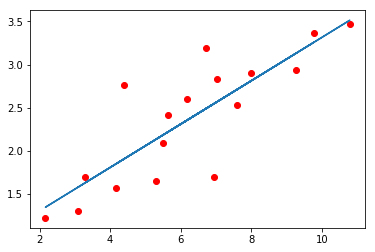

In [16]:
#initial cost, before optimizing
print("Initial cost={:.9f}".format(
    mean_square_fn(linear_regression,train_X,train_Y)),
     "W=",W.numpy(),"b=",b.numpy())

#Training 
for step in range(num_steps):
    optimizer.apply_gradients(grad(linear_regression,train_X,train_Y))
    if(step+1)%display_step==0 or step ==0:
        print("Epoch:",'%04d'%(step+1),"cost=","{:.9f}",format(mean_square_fn(linear_regression,train_X,train_Y)),
              "W=",W.numpy(),"b=",b.numpy())
        
#graphic display
plt.plot(train_X,train_Y,'ro',label='Origrinal data')
plt.plot(train_X,np.array(W*train_X+b),label='Fiited line')
plt.legend()
plt.show()